# PD 6
Klaudia Gruszkowska

In [1]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import warnings
warnings.filterwarnings('ignore')

C:\Users\klgru\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


### Wczytanie danych

In [2]:
imgs= fetch_olivetti_faces()

In [3]:
type(imgs)

sklearn.utils.Bunch

### Wyświetlenie pierwszego obrazka

In [4]:
data = imgs['data']
target = imgs['target']
first = data[0]
image_shape = (64, 64)
first = first.reshape(image_shape)

In [5]:
image_reshape = (4096,)

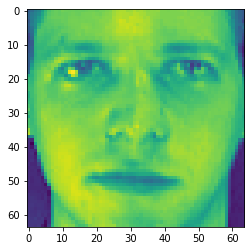

In [6]:
imshow(first)

### Wyświetlenie 40 różnych twarzy ze zbioru

In [7]:
def show_distinct_people(images, unique_ids):
    fig, ax=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    ax=ax.flatten()
    
    for unique_id in unique_ids:
        image_index=unique_id*10
        image = images[image_index].reshape(image_shape)
        ax[unique_id].imshow(image)
    plt.suptitle("distinct people")

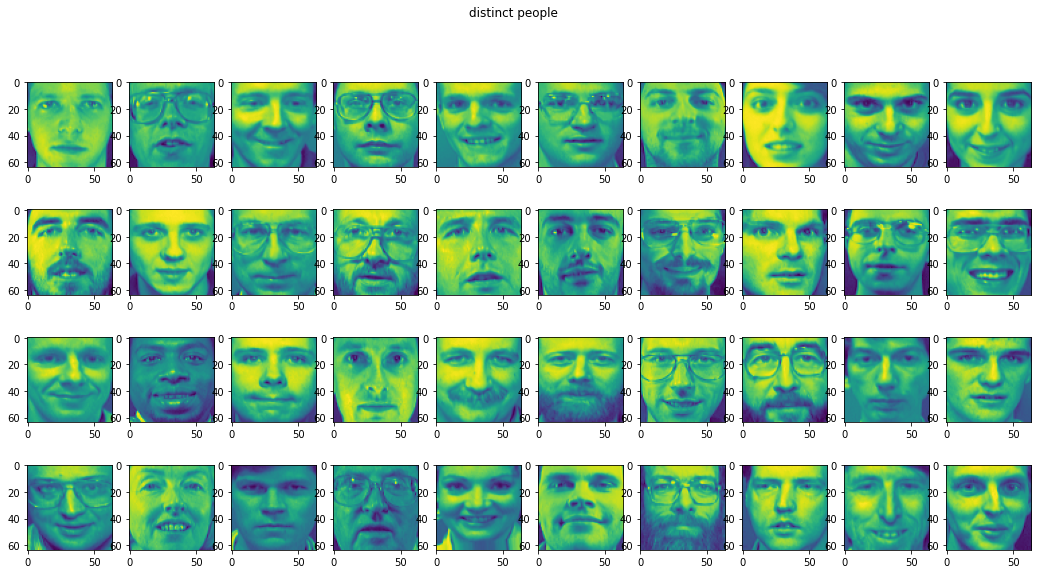

In [8]:
show_distinct_people(data, np.unique(target))

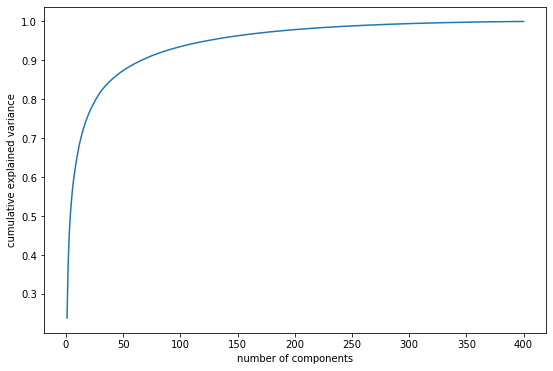

In [9]:
from sklearn.decomposition import PCA
pca = PCA().fit(data)

plt.figure(figsize=(9,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Z wykresu możemy wnioskować, że przy ilości komponentów = 100 powinniśmy dostać już 90% wyjaśnionej wariancji.

In [10]:
pca = PCA(n_components=100)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
transform = pca.transform(data)

In [12]:
import numpy as np
variance = pca.explained_variance_ratio_

In [13]:
np.sum(variance)

0.9349785

Tak jak wstępnie odczytaliśmy z wykresy procent wytłumaczonej wariancji jest równy około 93 %.

Sprawdzę jaką wielkość mają obrazki po wykonaniu kompresji.

In [14]:
transform.shape

(400, 100)

In [15]:
stopien_kompresji = 4096/100

Stopień kompresji jest równy w tym przypadku 40.96 

### Transformacja odwrotna

In [16]:
data_inverse =pca.inverse_transform(transform)

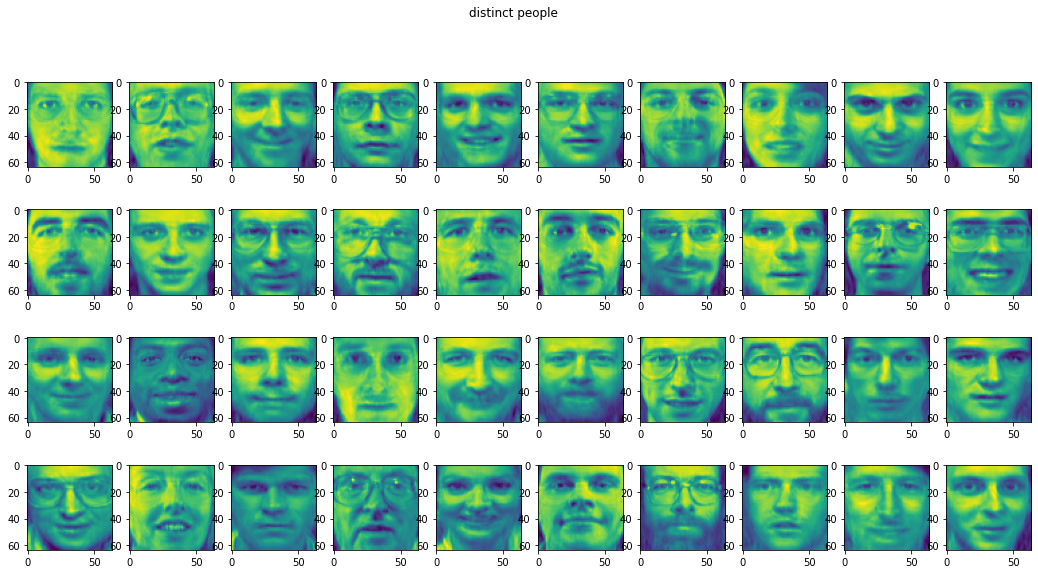

In [17]:
show_distinct_people(data_inverse, np.unique(target))

Nie widać różnicy na obrazkach po transformacji odwrotnej jednak policzmy błąd RMSE.

In [18]:
import sklearn
print(sklearn.__version__)

0.21.2


In [19]:
from sklearn.metrics import mean_squared_error
RMSE =[]

unique_ids = np.unique(target)
for unique_id in unique_ids:
        image_index=unique_id*10
        RMSE.append(np.sqrt(mean_squared_error(data[image_index], data_inverse[image_index])))
        

In [20]:
RMSE

[0.03470033,
 0.04442406,
 0.033902094,
 0.041122954,
 0.02634682,
 0.03402049,
 0.036855992,
 0.03285588,
 0.028687503,
 0.03210611,
 0.036630724,
 0.032977432,
 0.0350102,
 0.034436055,
 0.036475766,
 0.037947156,
 0.038838305,
 0.03592911,
 0.03381509,
 0.038385253,
 0.033868443,
 0.03936113,
 0.029059747,
 0.032999203,
 0.027355336,
 0.03318466,
 0.042099524,
 0.028118424,
 0.03035317,
 0.027802462,
 0.027411498,
 0.038839012,
 0.03345632,
 0.035843022,
 0.039632484,
 0.036621306,
 0.033996817,
 0.038485825,
 0.029473314,
 0.032494415]

In [21]:
print('Średnia błędu RMSE: ',np.median(RMSE))
print('Odchylenie standardowe :', np.std(RMSE))

Średnia błędu RMSE:  0.034008652
Odchylenie standardowe : 0.004282428


Błąd jest niewielki, nie przekracza części dziesiątych.

Następnie przygotuję zmodyfikowane obrazki. Każda dziesiątka obrazków będzie poddana innej modyfikacji.

In [22]:
data_copy = data.copy()
unique_ids_1 = np.unique(target)[0:10]
unique_ids_2 = np.unique(target)[10:20]
unique_ids_3 = np.unique(target)[20:30]
unique_ids_4 = np.unique(target)[30:40]

Na pierwszej dziesiątce obrazków będzie wykonany negatyw.

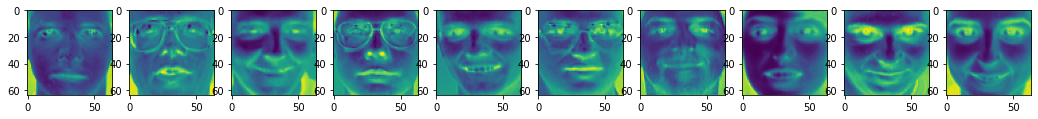

In [23]:
fig, ax=plt.subplots(nrows=1, ncols=10, figsize=(18, 9))
ax=ax.flatten()

for unique_id in unique_ids_1:
    image_index=unique_id*10
    image_copy = data_copy[image_index].reshape(image_shape)
    rows = len(image_copy)
    columns = len(image_copy[0])
    for row_index in range(rows):
        for column_index in range(columns):
            image_copy[row_index][column_index] = 1 - image_copy[row_index][column_index]
    data_copy[image_index] = image_copy.reshape(image_reshape)
    ax[unique_id].imshow(image_copy)

Na drugiej dziesiątce zmodyfikuję obrazki na czarno-białe.

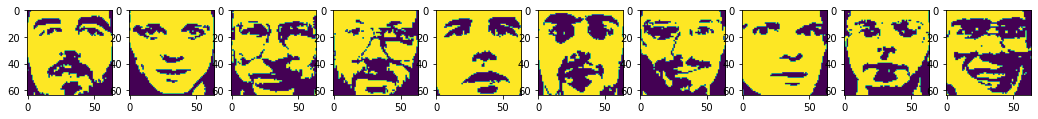

In [24]:
fig, ax=plt.subplots(nrows=1, ncols=10, figsize=(18, 9))
ax=ax.flatten()
prog=0.5

for unique_id in unique_ids_2:
    image_index=unique_id*10
    image_copy = data_copy[image_index].reshape(image_shape)
    rows = len(image_copy)
    columns = len(image_copy[0])
    for row_index in range(rows):
        for column_index in range(columns):
            image_copy[row_index][column_index] = 0 if image_copy[row_index][column_index] < prog else 1
    data_copy[image_index] = image_copy.reshape(image_reshape)
    ax[unique_id-10].imshow(image_copy)

Trzecią przeciemnię.

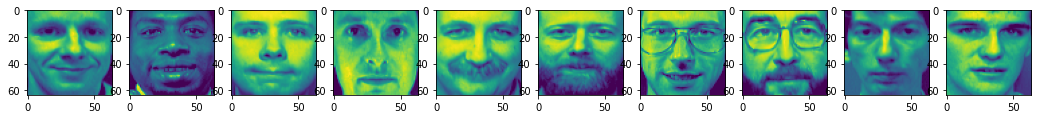

In [25]:
fig, ax=plt.subplots(nrows=1, ncols=10, figsize=(18, 9))
ax=ax.flatten()
v = -0.2

for unique_id in unique_ids_3:
    image_index=unique_id*10
    image_copy = data_copy[image_index].reshape(image_shape)
    rows = len(image_copy)
    columns = len(image_copy[0])
    for row_index in range(rows):
        for column_index in range(columns):
            image_copy[row_index][column_index] = min(max(image_copy[row_index][column_index] + v, 0), 1)
    data_copy[image_index] = image_copy.reshape(image_reshape)
    ax[unique_id-20].imshow(image_copy)

A czwartą obrócę o 90 stopni.

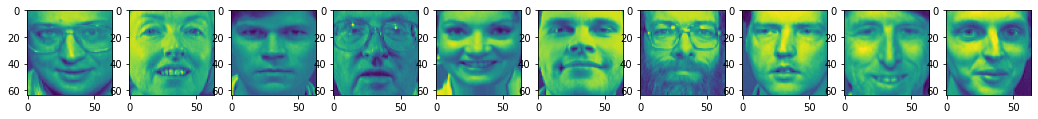

In [26]:
fig, ax=plt.subplots(nrows=1, ncols=10, figsize=(18, 9))
ax=ax.flatten()


for unique_id in unique_ids_4:
    image_index=unique_id*10
    image_copy = data_copy[image_index].reshape(image_shape)
    rows = len(image_copy)
    columns = len(image_copy[0])
    image_copy = np.transpose(image_copy)
    data_copy[image_index] = image_copy.reshape(image_reshape)
    ax[unique_id-30].imshow(image_copy)

Na tak zmodyfikowanych obrazkach przeprowadzę transformację i transformację odwrotną.

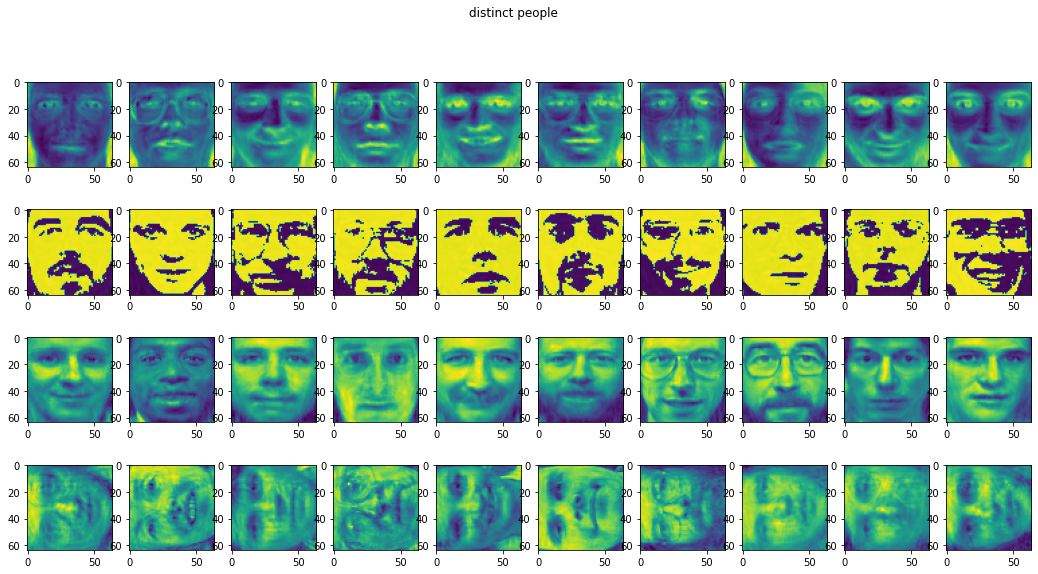

In [27]:
pca.fit(data_copy)
transform_copy = pca.transform(data_copy)
variance_copy = pca.explained_variance_ratio_
data_inverse_copy =pca.inverse_transform(transform_copy)
show_distinct_people(data_inverse_copy, np.unique(target))

In [28]:
RMSE_copy =[]

unique_ids = np.unique(target)
for unique_id in unique_ids:
        image_index=unique_id*10
        RMSE_copy.append(np.sqrt(mean_squared_error(data[image_index], data_inverse_copy[image_index])))
RMSE_copy    

[0.40081087,
 0.28311938,
 0.3301396,
 0.29603302,
 0.28346196,
 0.36264005,
 0.40711215,
 0.45594248,
 0.3258061,
 0.3771673,
 0.34127542,
 0.33698404,
 0.3983464,
 0.36468062,
 0.37472016,
 0.37070093,
 0.3603382,
 0.32609287,
 0.35505018,
 0.3839762,
 0.20190045,
 0.2009212,
 0.20209204,
 0.20209067,
 0.20144513,
 0.20133744,
 0.20191444,
 0.20078896,
 0.20014168,
 0.20181066,
 0.1864885,
 0.16738346,
 0.16575901,
 0.13788919,
 0.20429558,
 0.24197288,
 0.2820235,
 0.24092042,
 0.10334686,
 0.20261224]

In [29]:
print('Średnia błędu RMSE: ',np.median(RMSE_copy))
print('Odchylenie standardowe :', np.std(RMSE_copy))

Średnia błędu RMSE:  0.28257143
Odchylenie standardowe : 0.088770755


In [30]:
diff = []
zip_object = zip(RMSE_copy, RMSE)
for list1_i, list2_i in zip_object:
    diff.append(list1_i-list2_i)
diff

[0.36611053,
 0.23869532,
 0.29623753,
 0.25491008,
 0.25711513,
 0.32861957,
 0.37025616,
 0.4230866,
 0.2971186,
 0.3450612,
 0.3046447,
 0.3040066,
 0.3633362,
 0.33024457,
 0.33824438,
 0.33275378,
 0.3214999,
 0.29016376,
 0.3212351,
 0.34559095,
 0.168032,
 0.16156006,
 0.17303228,
 0.16909146,
 0.17408979,
 0.16815278,
 0.15981492,
 0.17267054,
 0.16978851,
 0.17400819,
 0.15907699,
 0.12854445,
 0.13230269,
 0.10204617,
 0.16466309,
 0.20535158,
 0.24802667,
 0.2024346,
 0.07387355,
 0.17011783]

In [31]:
print('Średnia błędu RMSE: ',np.median(diff))
print('Odchylenie standardowe :', np.std(diff))

Średnia błędu RMSE:  0.243361
Odchylenie standardowe : 0.08800179


Błąd dla danych zmodyfikowanych jest zdecydowanie większy od oryginalnych. Dlatego też PCA może wskazywać na anamalie lub modyfikacje danych.